# Parquet and GeoParquet

**Apache Parquet** or just Parquet is an open-source , column oriented file format that makes it faster to retrieve data and uses less memory space for tabular data, than CSV.

It is very popular for big data repositories.

The geospatial version of parquet for storing vector data is the **GeoParquet**.

This format comes from the necessity to have an efficient and standardized format to store big geospastial data efficiently.

Introduced in December 2022.

## Catalogue search

In [26]:
# Import all necessary libraries

import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client
import planetary_computer

import contextily as ctx # for adding basemaps

we use the 2020 US Census Collection id `us-census` to look for the data in the MPC catalog.

This collection has each tabular file as an item.
Note: items don't have data, they only have urls that point to data.

In [9]:
# open MPC catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# search whole collection
search = catalog.search(collections=["us-census"])

# retrieve items
items = {item.id: item for item in search.items()}
list(items)

['2020-census-blocks-population',
 '2020-census-blocks-geo',
 '2020-cb_2020_us_vtd_500k',
 '2020-cb_2020_us_unsd_500k',
 '2020-cb_2020_us_ttract_500k',
 '2020-cb_2020_us_tract_500k',
 '2020-cb_2020_us_tbg_500k',
 '2020-cb_2020_us_state_500k',
 '2020-cb_2020_us_sldu_500k',
 '2020-cb_2020_us_sldl_500k',
 '2020-cb_2020_us_scsd_500k',
 '2020-cb_2020_us_region_500k',
 '2020-cb_2020_us_place_500k',
 '2020-cb_2020_us_nectadiv_500k',
 '2020-cb_2020_us_necta_500k',
 '2020-cb_2020_us_nation_5m',
 '2020-cb_2020_us_metdiv_500k',
 '2020-cb_2020_us_elsd_500k',
 '2020-cb_2020_us_division_500k',
 '2020-cb_2020_us_csa_500k',
 '2020-cb_2020_us_cousub_500k',
 '2020-cb_2020_us_county_within_cd116_500k',
 '2020-cb_2020_us_county_500k',
 '2020-cb_2020_us_concity_500k',
 '2020-cb_2020_us_cnecta_500k',
 '2020-cb_2020_us_cd116_500k',
 '2020-cb_2020_us_cbsa_500k',
 '2020-cb_2020_us_bg_500k',
 '2020-cb_2020_us_aitsn_500k',
 '2020-cb_2020_us_aiannh_500k',
 '2020-cb_2020_72_subbarrio_500k',
 '2020-cb_2020_02_anrc_

In [10]:
# create a dictionary using list comprehension
# for each item in search.items access item.id and assign it to a current item
items = {item.id : item for item in search.items()}

In [11]:
items

{'2020-census-blocks-population': <Item id=2020-census-blocks-population>,
 '2020-census-blocks-geo': <Item id=2020-census-blocks-geo>,
 '2020-cb_2020_us_vtd_500k': <Item id=2020-cb_2020_us_vtd_500k>,
 '2020-cb_2020_us_unsd_500k': <Item id=2020-cb_2020_us_unsd_500k>,
 '2020-cb_2020_us_ttract_500k': <Item id=2020-cb_2020_us_ttract_500k>,
 '2020-cb_2020_us_tract_500k': <Item id=2020-cb_2020_us_tract_500k>,
 '2020-cb_2020_us_tbg_500k': <Item id=2020-cb_2020_us_tbg_500k>,
 '2020-cb_2020_us_state_500k': <Item id=2020-cb_2020_us_state_500k>,
 '2020-cb_2020_us_sldu_500k': <Item id=2020-cb_2020_us_sldu_500k>,
 '2020-cb_2020_us_sldl_500k': <Item id=2020-cb_2020_us_sldl_500k>,
 '2020-cb_2020_us_scsd_500k': <Item id=2020-cb_2020_us_scsd_500k>,
 '2020-cb_2020_us_region_500k': <Item id=2020-cb_2020_us_region_500k>,
 '2020-cb_2020_us_place_500k': <Item id=2020-cb_2020_us_place_500k>,
 '2020-cb_2020_us_nectadiv_500k': <Item id=2020-cb_2020_us_nectadiv_500k>,
 '2020-cb_2020_us_necta_500k': <Item id=20

In [13]:
# access counties

item = items['2020-cb_2020_us_county_500k']
item


id: 2020-cb_2020_us_county_500k
"bbox: [-179.148909, -14.548699, 179.77847, 71.365162]"
datetime: 2021-08-01T00:00:00Z
proj:epsg: 4269
"table:columns: [{'name': 'STATEFP', 'type': 'byte_array', 'description': 'State FIPS Code'}, {'name': 'COUNTYFP', 'type': 'byte_array', 'description': 'County FIPS code'}, {'name': 'COUNTYNS', 'type': 'byte_array'}, {'name': 'AFFGEOID', 'type': 'byte_array', 'description': 'American FactFinder summary level code + geovariant code + ""00US"" + GEOID'}, {'name': 'GEOID', 'type': 'byte_array', 'description': 'Concatenation of State FIPS and county FIPS code'}, {'name': 'NAME', 'type': 'byte_array', 'description': 'County name'}, {'name': 'NAMELSAD', 'type': 'byte_array', 'description': 'Name and Legal/statistical description'}, {'name': 'STUSPS', 'type': 'byte_array', 'description': 'FIPS State Postal Code'}, {'name': 'STATE_NAME', 'type': 'byte_array'}, {'name': 'LSAD', 'type': 'byte_array', 'description': 'Legal/statistical classification'}, {'name': 'ALAND', 'type': 'int64', 'description': 'Current land area'}, {'name': 'AWATER', 'type': 'int64', 'description': 'Current water area'}, {'name': 'geometry', 'type': 'byte_array', 'description': 'coordinates for County polygons'}]"
table:row_count: 3234
https://stac-extensions.github.io/table/v1.2.0/schema.json
https://stac-extensions.github.io/projection/v1.0.0/schema.json
href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root


In [15]:
# note: data is store in assets section of an item
# open an asset 
asset = item.assets["data"]
asset

href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root
roles: ['data']
owner: 2020-cb_2020_us_county_500k
"table:storage_options: {'account_name': 'ai4edataeuwest', 'credential': 'st=2023-12-03T21%3A27%3A57Z&se=2023-12-11T21%3A27%3A58Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-04T21%3A27%3A56Z&ske=2023-12-11T21%3A27%3A56Z&sks=b&skv=2021-06-08&sig=MGISjKxW2Knmh4sxC9R6afFzmJ41RXnY62L1mn7y/rg%3D'}"


## Opening Geo(Parquet)

To open the parquet file we use the `gpd.read_parquet()` function using the asset's URL pointing to the data:

In [20]:
counties = gpd.read_parquet(asset.href,
                           storage_options=asset.extra_fields['table:storage_options'])

counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."


In [21]:
type(counties)

geopandas.geodataframe.GeoDataFrame

## Contextily

This is Python library to add basemaps.
This retrieves tile maps from the internet and makes it possible to plot them alongside our vector data.

**Examples**

We want to plot the Santa Barbara county polygon together with a basemap.

In [23]:
sb = counties[counties.NAME == "Santa Barbara"]
sb

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1222,06,083,00277306,0500000US06083,06083,Santa Barbara,Santa Barbara County,CA,California,06,7080860393,2729213352,"MULTIPOLYGON (((-119.04704 33.48382, -119.0384..."


**Tip**: reproject your vector data to the CRS of contextily’s tiles EPSG 3857.

Although contextily’s tiles can be reprojected to match the CRS of the vector data, it can be easier to reproject your vector data to EPSG 3857 instead. 

The CRS EPSG 3857 (Spherical Mercator / Web Mercator) is a projected coordinate system used for rendering maps online, including Google Maps and OpenStreetMap among others. 

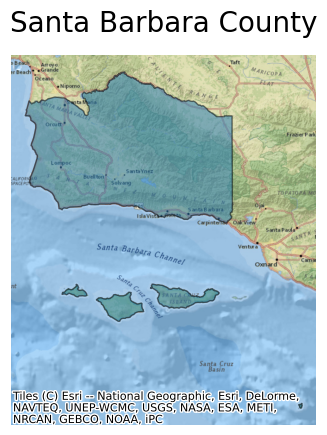

In [29]:
fig, ax = plt.subplots()

(sb.to_crs(epsg=3857).
plot(ax=ax, figsize=(7,7), alpha=0.5, edgecolor='k')
)

# add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)

ax.set_title('Santa Barbara County', fontdict={'fontsize':'20'})
ax.set_axis_off()